__Краткое описание:__ Заказчик - интернет-магазин "Стримчик", который продает компьютерные игры. Необходимо проанализировать данные из открытых источников для планирования продуктовой линиии и рекламных компаний.

__Цель проекта:__ Выявить определяющие успешность игр закономерности.

Примечание: ESRB (Entertaiment Software Rating Board) - это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контерт и присваивает ему подходящую возврастную категорию ("для взрослых", "для детей младшего возраста", "для подростков").

__План работы:__

- выгрузить данные, осуществить первичный обзор;
- переименовать колонки, привести наименования к "змеиному регистру";
- определить, есть ли пропуски в данных; заполнить пропуски или удалить строки с пропусками;
- измененить тип данных;
- проверить данные на наличие явных и неявных дубликатов, исправить данные;
- рассчитать новые значения, добавить их в новые колонки;
- проанализировать данные в соответствии с поставленной целью проекта;
- составить портрет пользователя каждого региона;
- выдвинуть и проверить гипотезы;
- сформировать вывод, полученный из результатов анализа.

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#Импортируем библиотеки в отдельной ячейке.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
#Открываем файл и изучаем общую информацию по нему.
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
#Видим большое количество пропущенных значений.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#Импортируем таблицу с расшифровкой рейтинга ESBR
rating = pd.read_csv('/datasets/rating.csv')

In [7]:
rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 256.0+ bytes


# Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [9]:
#Приведём название столбцов к нижнему регистру.
data.columns = data.columns.str.lower()

In [10]:
#Проверяем результат.
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
#Изменим название столбца, это нам пригодится в дальнейшем для склейки двух таблиц
data = data.rename(columns={"rating": "rating_type"})

In [12]:
#Необходимо преобразовать данные в нужные типы
#Первым из них выбивается столбец с Годом выпуска. Нужно преобразовать в года.
#Так же вопрос возникает с типом данных object в столбце Оценка пользователей(user_score)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating_type        9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
data['year_of_release'].isna().sum()

269

__В столбце с годом выпуска необходимо убрать точки и десятичные числа, однако этого сделать невозможно пока не уберём пропущенные значения. Поступим по такому механизму, обозначим 1900 год для пропущенных значений.__

In [14]:
data['year_of_release'] = data['year_of_release'].fillna(1900)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating_type        9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [17]:
#Посмотрим на столбец Оценки пользователей.
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
data[data['user_score'] == 'tbd']['user_score'].count()

2424

In [19]:
data['user_score'].isna().sum()

6701

__Есть пропущенные значения и значения tbd(to be determinated). Tbd следует заменить на nan.__

In [20]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [21]:
#Изначально не хотелось менять пропущенные значения на какие-либо, но без этого мы не можем
#задействовать эти столбцы :(
#а ведь это, в теории, может исказить данные, если мы допустим будем брать среднее значение.
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].astype('float')
data['rating_type']=data['rating_type'].fillna('RP')

In [22]:
#На всяких случай приведём все слова по столбцам к нижнему регистру.
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating_type'] = data['rating_type'].str.lower()
rating['rating_type'] = rating['rating_type'].str.lower()
rating['decryption'] = rating['decryption'].str.lower()

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,rp
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,rp


In [24]:
#Дубликатов, вроде как, нет.
data.duplicated().sum()

0

In [25]:
#Посчитаем количество продаж во всех регионах и запишем в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales']+ data['jp_sales'] + data['other_sales'] 

In [26]:
#Проверяем результат
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,rp,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,rp,31.38


__Вывод по разделу:__
- Заменили пропущенные значения по столбцам с Оценкой критиков и пользователей
- Дубликатов по датасету не обнаружено
- Добавили столбец с общими продажами
- Привели весь датасет к нижнему регистру.

# Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Распределение по годам выпуска игр')

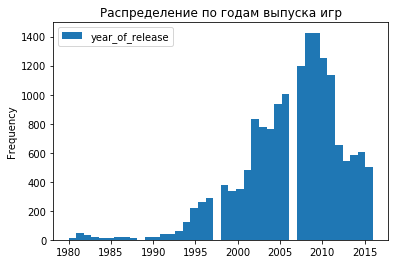

In [27]:
#Построим гистограмму по годам за исключением 1900г.(Мы ведь обозначили так пропущенные значения)
ax = data[data['year_of_release'] != 1900]['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Распределение по годам выпуска игр')

__Исходя из гистограммы видно, что общий массовый выпуск игр начался к 1995г. Самый пик пришёлся на 2009-2010гг. После этого пошёл спад, скорее всего по той причине, что рынок игр был перенасыщен и начали делать большой упор на мобильные игры.__

In [28]:
#Возьмём за актуальный период начиная с 2013 года. Взял именно такой период по той причине, что
#это позволит использовать текущие тренды и зависимости, но не захватываем пиковые периоды для
#некоторых платформ.
data_actual = data.query('year_of_release >= 2012')

In [29]:
#Узнаем самые популярные платформы на которые выпускались игры.
most_popular_platform = data_actual.groupby('platform').agg({'name':'count'}).reset_index()
most_popular_platform.sort_values(by='name', ascending=False).head()

,platform,name
3,ps3,493
6,psv,411
0,3ds,396
4,ps4,392
9,x360,292


Text(0.5, 1.0, 'Выпуск по наиболее популярным платформам')

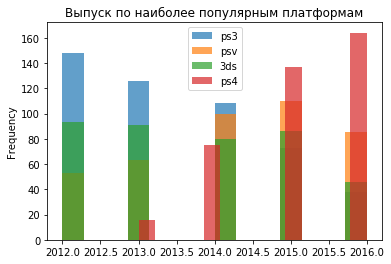

In [30]:
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == 'ps3')]['year_of_release'].plot(kind='hist', bins=14, alpha=0.7).legend()
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == 'psv')]['year_of_release'].plot(kind='hist', bins=14, alpha=0.7).legend()
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == '3ds')]['year_of_release'].plot(kind='hist', bins=14, alpha=0.7).legend()
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == 'ps4')]['year_of_release'].plot(kind='hist', bins=14, alpha=0.7).legend(['ps3', 'psv', '3ds', 'ps4'])
plt.title('Выпуск по наиболее популярным платформам')

__Возможно не самая наглядная гистограмма получилась, зато информативная. Взял за основу 4 самых популярных платформы. В диаграмме всё получилось немного наложено друг на друга, однако исходя из этого можно понять, что в среднем популярные платформы живут около 10 лет. И на смену им приходят новые платформы, как это получилось с ps2 и ps3.__

In [31]:
#Определим платформы, которые лидируют по продажам.
most_valuable_platforms = data_actual.groupby('platform').agg({'total_sales':'sum'}).reset_index()
most_valuable_platforms.sort_values(by='total_sales', ascending=False).head()

,platform,total_sales
4,ps4,314.14
3,ps3,288.79
9,x360,236.54
0,3ds,194.61
10,xone,159.32


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


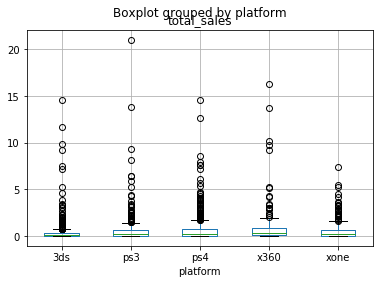

In [32]:
#Построим график "ящик с усами"
platform_name = ['ps4', 'ps3', 'x360', '3ds', 'xone', 'ps2' 'wii']
data_actual.query('platform in @platform_name').boxplot('total_sales', by='platform')

__Как и всегда в игровой индустрии получается так: "Всё или ничего". Если же выпускаются игры, которые в дальнейшем "стреляют", то они достигают своего пика, а так в основном все держатся на уровне ниже среднего. По боксплоту видно, что много выбросов с пиковыми значениями.__

Text(0.5, 1.0, 'Отзывы и без отзыва — критики')

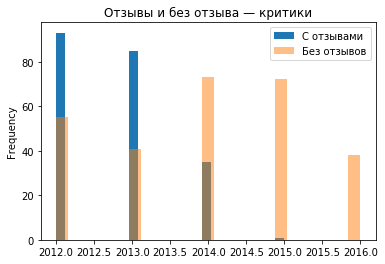

In [33]:
#Построим распределение по годам с отзывами и без. Возьмём самую популярную платформу ps3.
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == 'ps3') & (data_actual['critic_score'] >= 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == 'ps3') & (data_actual['critic_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend(['С отзывами', 'Без отзывов'])
plt.title('Отзывы и без отзыва — критики')

Text(0.5, 1.0, 'Отзывы и без отзыва — пользователи')

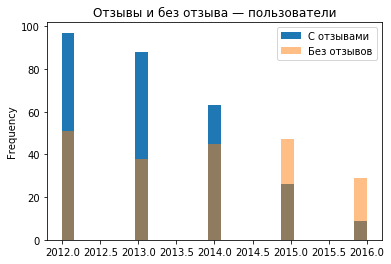

In [34]:
#Построим распределение по годам с отзывами и без. Возьмём самую популярную платформу ps3.
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == 'ps3') & (data_actual['user_score'] >= 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
data_actual[(data_actual['year_of_release'] != 1900) & (data_actual['platform'] == 'ps3') & (data_actual['user_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend(['С отзывами', 'Без отзывов'])
plt.title('Отзывы и без отзыва — пользователи')

In [35]:
#Посчитаем общую корреляцию по всем данным.
critic_score = data_actual[data_actual['critic_score'] != -1]
user_score = data_actual[data_actual['user_score'] != -1]
total_sales = data_actual['total_sales']

In [36]:
corr_data = pd.DataFrame()
corr_data['critic_score'] = critic_score['critic_score']
corr_data['user_score'] = user_score['user_score']
corr_data['total_sales']=data_actual['total_sales']
corr = corr_data[['critic_score', 'user_score', 'total_sales']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score,total_sales
critic_score,100.00%,51.77%,30.82%
user_score,51.77%,100.00%,0.06%
total_sales,30.82%,0.06%,100.00%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6487f7ded0>,
      dtype=object)

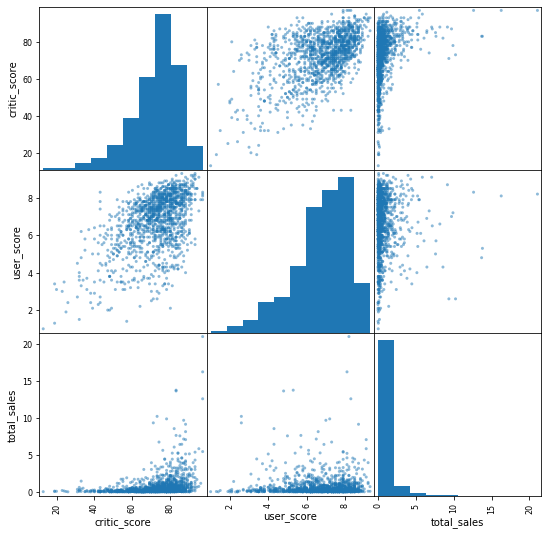

In [37]:
pd.plotting.scatter_matrix(corr_data, figsize=(9,9))

__Исходя из полученных диаграмм, видно, что отзывы пользователей и критиков сильно не разнятся, наверняка это потому, что критикам зачастую приходится соглашаться с пользователями. Сильная корреляция между отзывами критиков и пользователей. Небольшая корреляция между отзывами критиков и общими продажами так же присутствует.__

In [38]:
#Теперь узнаем игры какого жанра наиболее популярны и прибыльны.
most_popular_genre = data_actual.groupby('genre').agg({'name':'count', 'total_sales' : 'sum'}).reset_index()
most_popular_genre['profit']=most_popular_genre['total_sales']/most_popular_genre['name']
most_popular_genre.sort_values(by='profit', ascending=False)

,genre,name,total_sales,profit
8,shooter,235,304.73,1.296723
4,platform,85,61.00,0.717647
10,sports,268,181.07,0.675634
7,role-playing,370,192.80,0.521081
6,racing,115,53.50,0.465217
3,misc,192,85.04,0.442917
9,simulation,80,35.12,0.439000
0,action,1031,441.12,0.427856
2,fighting,109,44.49,0.408165
11,strategy,71,13.34,0.187887


__Однозначным лидером по всем показателям среди жанров является "Экшен". Однако точно можно сказать, что количество - это не всегда качество, как это с "Шутерами", "Платформенными играми" или "Спортивными". Игры по этим жанрам были максимально прибыльные. Наименее прибыльные - "Паззл", "Приключения". Выпущено много - покупок мало.__

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

__Самые популярные платформы (топ-5).__

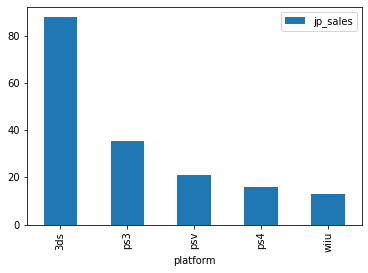

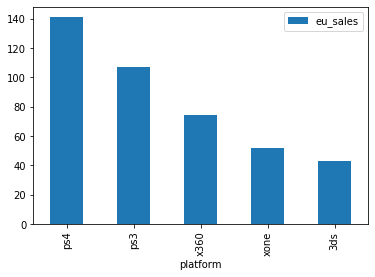

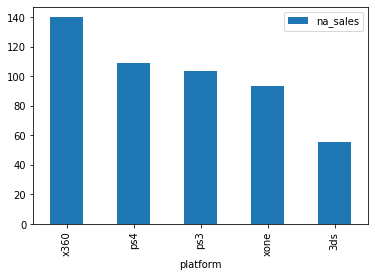

In [39]:
#Найдём топ-5 платформ по выручке и отобразим на диаграммах.
data_actual.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
data_actual.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
data_actual.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

1. В Японии самой популярной платформой является 3DS и по выручке достигает ~90 млн, далее распологаются ps3 и psv.
2. В Европе самые популярные ps4 c общей выручкой ~140 млн., далее распологаются ps3, x360.
3. В Америке лидером является x360, а далее идёт крепкая конкуренция от ps4, ps3, xone - эти платформы распологаются практически на одном уровне.

__Самые популярные жанры (топ-5).__

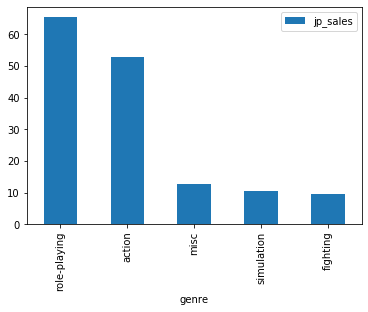

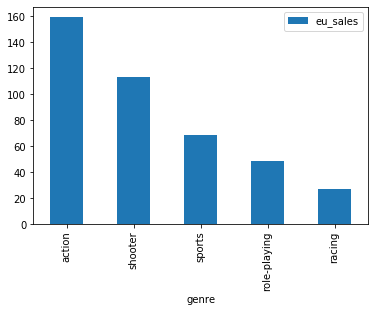

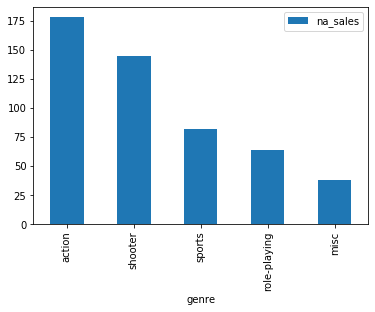

In [40]:
#Узнаем топ-5 по предпочтению жанров по регионам
data_actual.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
data_actual.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
data_actual.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

1. В Японии самым популярным жанром является "Компьютерные ролевые игры", которые обгоняет своих преследователей более, чем в 2 раза. Следующими идут "Экшен" и "Спортивные".
2. В Европе самыми популярными являются "Экшен" игры, далее уже идут "Шутеры" и "Спортивные".
3. В Америке идентично Европе первую тройку замыкают "Экшн", "Шутер", "Спортивные".

__Разберёмся, влияет ли рейтинг ESRB на продажи в отдельном регионе?__

In [41]:
#Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.
data_actual = data_actual.merge(rating, on='rating_type', how='right')

In [42]:
#Отлично! Описание рейтинга приклеили к таблице.
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales,decryption
0,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05,от 17 лет
1,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27,от 17 лет
2,call of duty: black ops ii,ps3,2012.0,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79,от 17 лет
3,call of duty: black ops ii,x360,2012.0,shooter,8.25,4.24,0.07,1.12,83.0,4.8,m,13.68,от 17 лет
4,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62,от 17 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,dragon ball z for kinect,x360,2012.0,fighting,0.01,0.00,0.00,0.00,49.0,2.1,t,0.01,подросткам 13—19 лет
2885,end of nations,pc,2012.0,strategy,0.01,0.00,0.00,0.00,-1.0,-1.0,t,0.01,подросткам 13—19 лет
2886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,k-a,NaN,для всех(до 1998 года)
2887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ao,NaN,только для взрослых


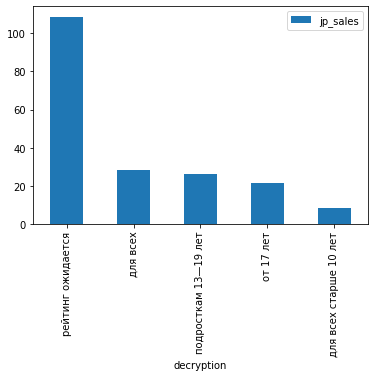

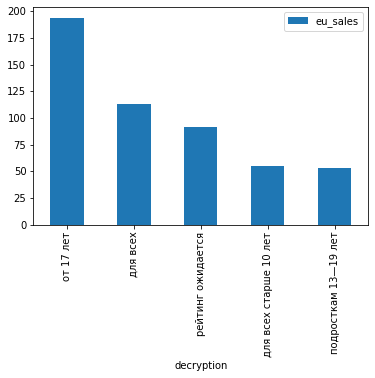

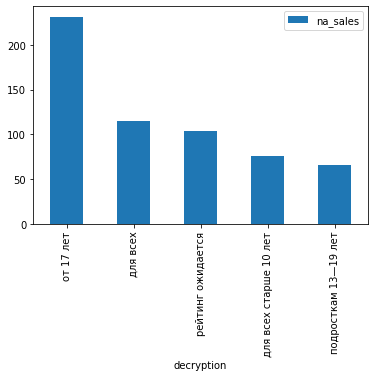

In [43]:
data_actual.groupby(by='decryption').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
data_actual.groupby(by='decryption').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
data_actual.groupby(by='decryption').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

__По регионам:__
- В Японии преимущественное большинство занимают те игры, по которым рейтинг ожидается. Далее Расположен "для всех" и "подросткам 13-19 лет" находится практически на одном уровне.
- В Европе группа от 17 лет является лидером, в след за ней идёт "Для всех", которая практически вдвое меньше первой.
- В Америке практически такая же ситуация как и в Европе. "Группа от 17 лет" является лидером, в след за ней идёт "Для всех", которая практически вдвое меньше первой.

# Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

__Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.__


Гипотезы:

H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый.

H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [44]:
#альфа укажем как и всегда
alpha = 0.05

In [45]:
data_actual['platform'].unique()

array(['ps3', 'x360', 'ps4', 'xone', 'pc', 'psv', 'wiiu', '3ds', 'ds',
       'wii', 'psp', nan], dtype=object)

In [46]:
xone = data_actual[(data_actual['platform'] == 'xone') & (data_actual['user_score'] >= 0)]['user_score']
pc = data_actual[(data_actual['platform'] == 'pc') & (data_actual['user_score'] >= 0)]['user_score']

In [47]:
results = st.ttest_ind(xone, pc)

In [48]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


Гипотезы:

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

In [49]:
action = data_actual[(data_actual['genre'] == 'action') & (data_actual['user_score'] >= 0)]['user_score']
sports = data_actual[(data_actual['genre'] == 'sports') & (data_actual['user_score'] >= 0)]['user_score']

In [50]:
results = st.ttest_ind(action, sports)

In [51]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


# Шаг 6. Напишите общий вывод

- В дальнейшем следовало бы сразу прикреплять таблицу с расшифровкой рейтинга к основной таблице, это дало бы большее понимание.
- Сейчас рынок выпускаемых игр немного упал, потому что разработчики стали осмотрительнее и более скрупулёзно подходить к этому вопросу.
- Необходимо избавиться от пустых ячеек в отзывах. Отзывы - неотъемлимая часть при ценообразовании и продвижении продукта.
- Необходимо опираться на популярность определённых платформ и возрастную категорию по регионам при представлении продукта.
- Т.к. PS4 и Xbox One были выпущены лишь в 2013 году, они не успели набрать своих оборотов. На мой взгляд самыми популярными консолями будут являться - PS4, Xbox One и Nintendo. Конечно же не стоит забывать и о наших ПК.:)

__По регионам:__
- В Японии основная категория с "Ожидающимся рейтингом", а далее "Для всех"., самым популярным жанром является "Компьютерные ролевые игры", которые обгоняет своих преследователей более, чем в 2 раза. Следующими идут "Экшен" и "Спортивные", а игровая платформа - 3DS.
- В Европе основная категория людей от 17 лет, самыми популярными являются "Экшен" игры, далее уже идут "Спортивные" и "Шутеры", а самые популярные платформы PlayStation4 и PlayStation3. В след за ними идут Xbox360 и Xone.
- В Америке ситуация практически идентичная Европе. Основная категория людей от 17 лет, самыми популярными являются "Экшен" игры, далее уже идут "Спортивные" и "Шутеры", а самые популярные платформы Xbox360 и PlayStation4, далее идёт PlayStation3.